In [1]:
import os

import cv2
from PIL import Image
import random
import numpy as np
from utils.detect_line import detect_lines

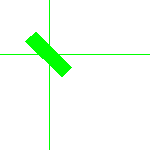

In [12]:
ori_img = cv2.imread('../static/img/b1.png')
img = ori_img[4450:4600, 4150:4300]
Image.fromarray(img)

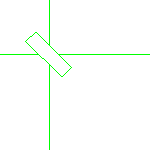

In [25]:
# 获取轮廓
def get_contours(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    nowhite = np.where(binary != 255)
    nowhite = set(zip(*nowhite))

    white = np.ones_like(img, dtype=np.uint8 ) * 255
    for x, y in nowhite:
        for dx, dy in zip([0, 1, 0, -1], [1, 0, -1, 0]):
            if (x + dx, y + dy) not in nowhite:
                white[x, y] = img[x, y]
    return white

contours_img = get_contours(img)
Image.fromarray(contours_img)

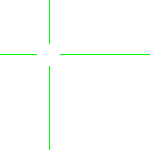

In [27]:
from utils.detect_line import detect_lines
lines, _, _ = detect_lines(img)
white = np.ones_like(img, dtype=np.uint8 ) * 255
for line in lines:
    cv2.line(white, line[0], line[1], line[2], 1)
Image.fromarray(white)

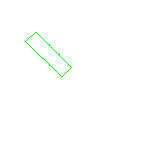

In [28]:
contours_img = get_contours(img)
for line in lines:
    cv2.line(contours_img, line[0], line[1], (255,255,255), 1)
Image.fromarray(contours_img)